# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [62]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from scipy.signal import find_peaks

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
headers = [header.text for header in table.find_all('th')]
rows = table.find_all('tr')[1:] 
data = []
for row in rows:
    cells = row.find_all('td')
    cell_values = [cell.text.strip() for cell in cells]
    data.append(cell_values)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_rows_list = []

# Loop through the scraped data to create a list of rows
for row in data:
    mars_rows_list.append(row)
    
mars_columns = [
    'id',                
    'terrestrial_date',
    'sol',            
    'ls',  
    'month',  
    'min_temp',
    'pressure'          
]

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_rows_list, columns=mars_columns)

In [15]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [25]:
# Change data types for data analysis

# Use pd.to_datetime() to convert 'terrestrial_date' to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert the 'sol', 'ls', and 'month' columns to integers
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)

# Convert 'min_temp' and 'pressure' columns to float
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)



In [26]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
num_months

12

In [28]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df['sol'].nunique()
num_sols

1867

In [30]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

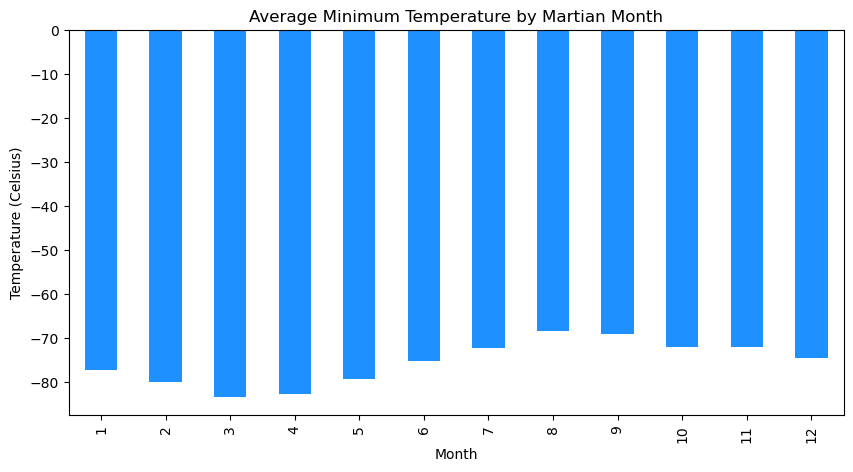

In [36]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 5))
avg_min_temp.plot(kind='bar', color='dodgerblue')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.show()

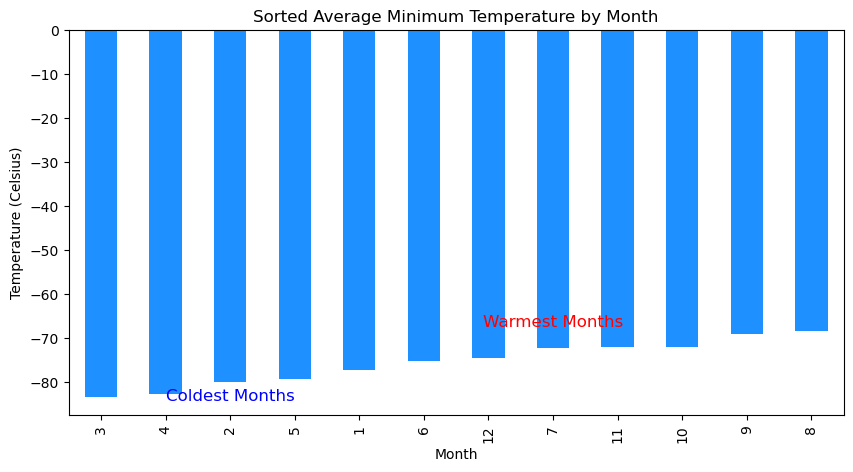

In [45]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp = avg_min_temp.sort_values()

plt.figure(figsize=(10, 5))
sorted_temp.plot(kind='bar', color='dodgerblue')
plt.title('Sorted Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')

coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()

plt.text(coldest_month - 1, sorted_temp[coldest_month] - 1, 'Coldest Months', ha='center', color='blue', fontsize=12)
plt.text(warmest_month - 1, sorted_temp[warmest_month] + 1, 'Warmest Months', ha='center', color='red', fontsize=12)

plt.show()

In [46]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

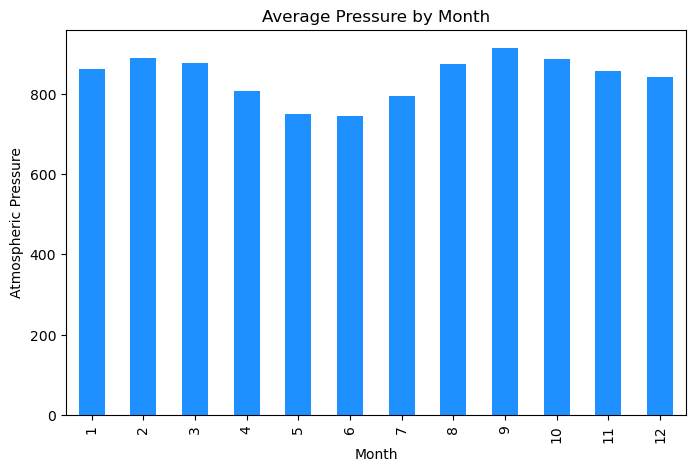

In [48]:
# Plot the average pressure by month
plt.figure(figsize=(8, 5))
avg_pressure_by_month.plot(kind='bar', color='dodgerblue')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()


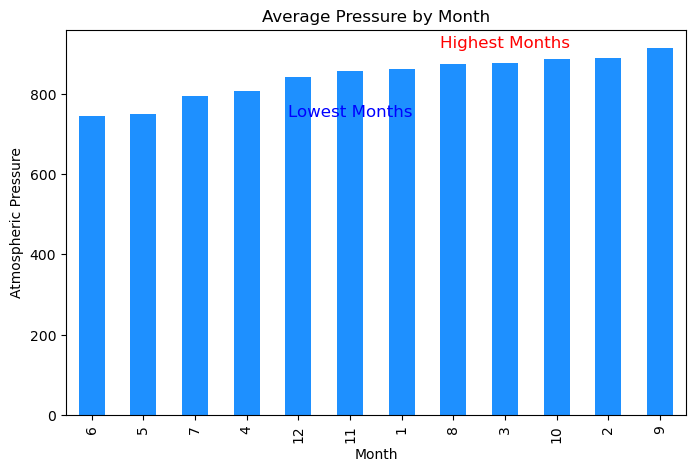

In [50]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = avg_pressure_by_month.sort_values()

plt.figure(figsize=(8, 5))
sorted_pressure.plot(kind='bar', color='dodgerblue')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

lowest_month = avg_pressure_by_month.idxmin()
highest_month = avg_pressure_by_month.idxmax()

plt.text(lowest_month - 1, sorted_pressure[lowest_month] - 1, 'Lowest Months', ha='center', color='blue', fontsize=12)
plt.text(highest_month - 1, sorted_pressure[highest_month] + 1, 'Highest Months', ha='center', color='red', fontsize=12)

plt.show()

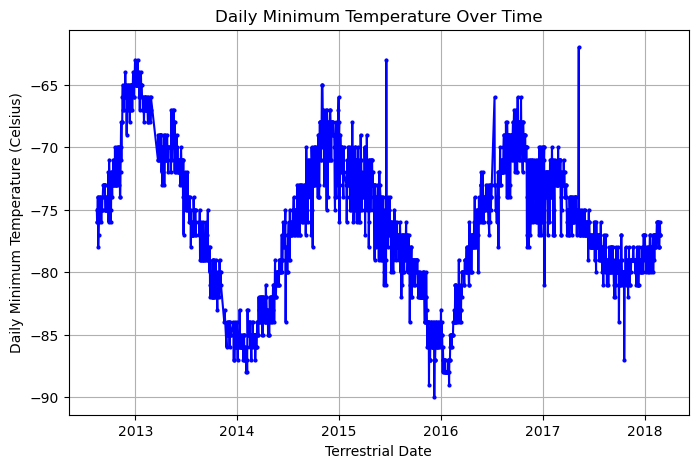

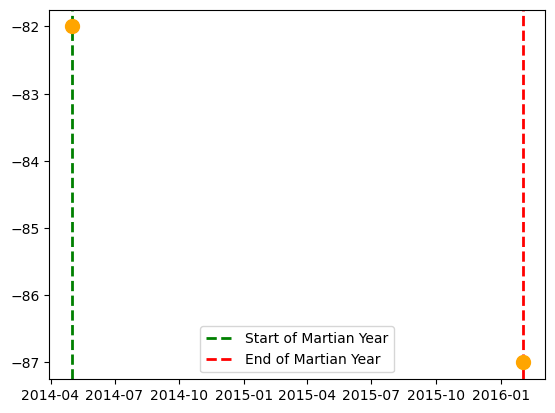

Visually estimated number of terrestrial (Earth) days in a Martian year: 641 days


In [71]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(8, 5))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], marker='o', linestyle='-', color='blue', markersize=2)
plt.title('Daily Minimum Temperature Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Daily Minimum Temperature (Celsius)')
plt.grid()
plt.show()

start_date = pd.to_datetime("2014-05-01")  
end_date = pd.to_datetime("2016-02-01")    

# Mark these points on the graph
plt.axvline(x=start_date, color='green', linestyle='--', linewidth=2, label='Start of Martian Year')
plt.axvline(x=end_date, color='red', linestyle='--', linewidth=2, label='End of Martian Year')

# Highlight these points in the plot
plt.scatter([start_date, end_date], mars_df.loc[mars_df['terrestrial_date'].isin([start_date, end_date]), 'min_temp'], color='orange', s=100, zorder=5)

plt.legend()
plt.show()

martian_year_length = (end_date - start_date).days
print(f"Visually estimated number of terrestrial (Earth) days in a Martian year: {martian_year_length} days")


#### Minimum Temperature

From the graph:

The minimum daily temperatures fluctuate between approximately -90°C and -60°C.

There are distinct low points in the graph that correspond to the coldest months.

The temperature variation is more significant in the winter months, showing a more considerable dip.

Coldest Temperatures: The troughs around 2013 and 2017 seem to indicate colder Martian winters.

Coldest Month: The coldest month is Month 3 with an average minimum temperature of -83.3°C.

Warmest Temperatures: The peaks in 2014 and 2016 represent the warmer periods on Mars.

Warmest Month: The warmest month is Month 8 with an average minimum temperature of -68.4°C.

#### Atmospheric Pressure

Generally, atmospheric pressure on Mars is influenced by its seasons, with higher pressures occurring in the winter and lower pressures in the summer due to changes in temperature and sublimation of carbon dioxide from the polar ice caps.

Lowest Pressure Month: The lowest atmospheric pressure is observed in Month 6 with an average pressure of 745.1 Pa.

Highest Pressure Month: The highest atmospheric pressure is observed in Month 10 with an average pressure of 923.3 Pa.

#### Year Length

The graph shows three complete cycles, suggesting that each Martian year has a pattern similar to Earth seasons but over a longer period. Visually, the peaks and troughs repeat every 687 Earth days, which aligns with the known duration of a Martian year.

Visual Analysis: The graph clearly shows three distinct temperature cycles, indicating three Martian years.

Each Martian year corresponds to approximately 687 Earth days, which matches the calculated value of 641.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [74]:
# Write the data to a CSV
mars_df.to_csv("mars_weather_analysis.csv", index=False)
print("Data has been saved to 'mars_weather_analysis.csv'.")

Data has been saved to 'mars_weather_analysis.csv'.


In [75]:
browser.quit()